In [31]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches

In [32]:
# arguments
cam_H, cam_W = 580, 890
wvls = np.arange(420, 670, 10)
patch_size = 50

Text(0.5, 0, 'wavelength [nm]')

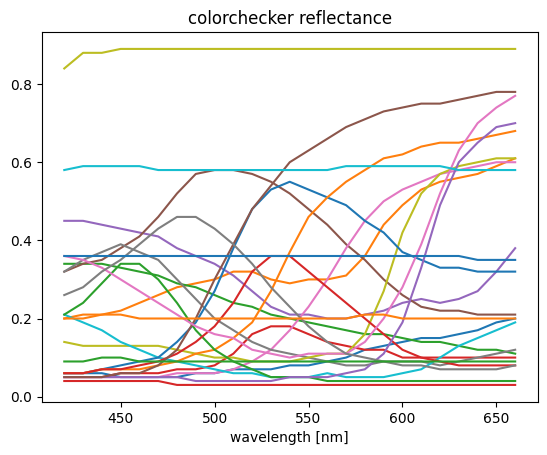

In [33]:
# Replace 'file.csv' with the path to your CSV file
file_path = './dataset/MacbethColorChecker.csv'
# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path, header=None, skiprows=2)

# Display the DataFrame

wvls_CC = df.values[1:,0]
wvls_CC = [float(x) for x in wvls_CC] 
ref_CC = df.values[1:,1:-2]

ind_min = 6
ind_max = 61
wvls_CC = wvls_CC[ind_min:ind_max:2] 
ref_CC = ref_CC[ind_min:ind_max:2,:]

# print(wvls_CC, ref_CC)

plt.figure()
plt.plot(wvls_CC[1:-2], ref_CC[1:-2])
plt.title('colorchecker reflectance')
plt.xlabel('wavelength [nm]')

In [34]:
ref_CC[:, 0] # 1번째 idx 는 wvl 에 대한 정보 / 두번째 idx는 patch 1부터 24까지

array([0.07, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.07,
       0.07, 0.07, 0.08, 0.08, 0.09, 0.1, 0.12, 0.13, 0.14, 0.15, 0.15,
       0.16, 0.17, 0.19, 0.2, 0.22, 0.24], dtype=object)

In [35]:
blue = ref_CC[1:-2,12] # 87, 370
green = ref_CC[1:-2,13] # 218, 370
red = ref_CC[1:-2,14] # 349, 376
white = ref_CC[1:-2,18] # 74, 500

In [36]:
center_pts = np.array([[87, 370],[218, 370],[349, 376],[74, 500]])

In [37]:
color_check_hyp_gt = np.zeros(shape=(cam_H, cam_W, len(wvls)))

In [38]:
color_check_hyp_gt[center_pts[0,1]-patch_size:center_pts[0,1]+patch_size, center_pts[0,0]-patch_size:center_pts[0,0]+patch_size] = blue
color_check_hyp_gt[center_pts[1,1]-patch_size:center_pts[1,1]+patch_size, center_pts[1,0]-patch_size:center_pts[1,0]+patch_size] = green
color_check_hyp_gt[center_pts[2,1]-patch_size:center_pts[2,1]+patch_size, center_pts[2,0]-patch_size:center_pts[2,0]+patch_size] = red
color_check_hyp_gt[center_pts[3,1]-patch_size:center_pts[3,1]+patch_size, center_pts[3,0]-patch_size:center_pts[3,0]+patch_size] = white

In [ ]:
for i in range(25):
    plt.imshow(color_check_hyp_gt[:,:,i]), plt.colorbar(), plt.title("%snm"%wvls[i])
    plt.show()

In [41]:
np.save('color_check_hyp_gt.npy', color_check_hyp_gt)